In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

/home/muttaqien-m/anaconda3/envs/tsuc2023/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/muttaqien-m/anaconda3/envs/tsuc2023/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZNK3c107SymBool10guard_boolEPKcl'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## ImageLoad Image

In [74]:
image_path = "./images/test/testa2.jpg"
image = cv2.imread(image_path)

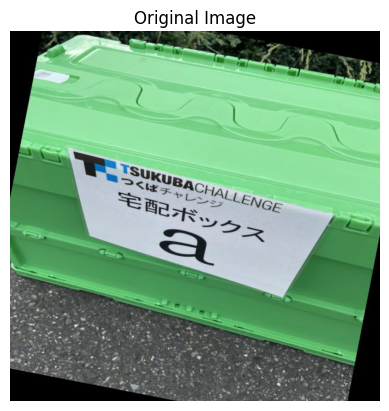

In [75]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

In [83]:
image.shape

(640, 640, 3)

In [84]:
zoomed_gray.shape

(1280, 1280)

## Preprocess Image

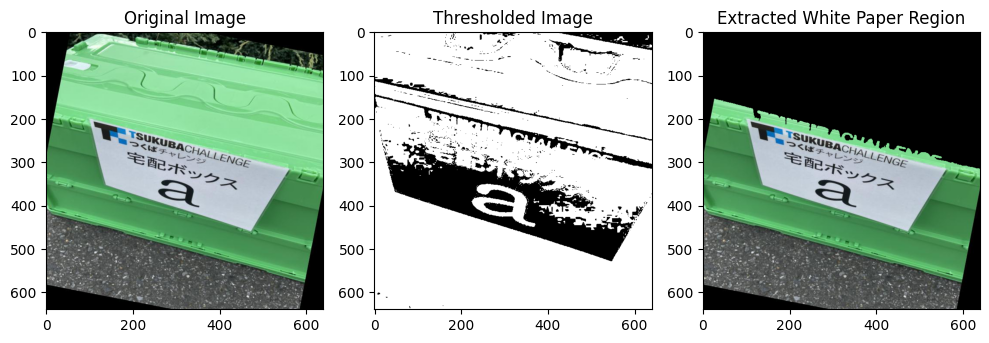

In [87]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the zoom factor
zoom_factor = 1.5 # Adjust the zoom factor as needed

# Get the original image size
height, width = gray.shape

# Calculate the new size after zooming
new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)

# Crop the region of interest (ROI) to maintain the original image size
start_row = int((new_height - height) / 2)
start_col = int((new_width - width) / 2)
end_row = start_row + height
end_col = start_col + width

# Crop the ROI from the zoomed grayscale image
zoomed_gray = cv2.resize(gray, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
zoomed_gray_cropped = zoomed_gray[start_row:end_row, start_col:end_col]

# Apply thresholding to create a binary mask (white paper will be white, and the rest black)
_, thresholded = cv2.threshold(zoomed_gray_cropped, 200, 255, cv2.THRESH_BINARY_INV)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour with the largest area (assuming it corresponds to the white paper)
largest_contour = max(contours, key=cv2.contourArea)

# Create a mask for the white paper region
mask = np.zeros_like(thresholded)
cv2.drawContours(mask, [largest_contour], 0, 255, thickness=cv2.FILLED)

# Bitwise AND operation to extract the white paper region
result = cv2.bitwise_and(image, image, mask=mask)

# Display the original image, thresholded image, and the result
plt.figure(figsize=(10, 6))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded Image')

plt.subplot(133)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Extracted White Paper Region')

plt.tight_layout()
plt.show()

## Convert BW

In [104]:
images_dir_path = './images/train/A/'

images_dir_thr_path = './images_thr/train/A/'

In [105]:
for image in os.listdir(images_dir_path):
   
    # Load the image
    imagecv = cv2.imread(images_dir_path + image)

    # Convert the image to grayscale
    gray = cv2.cvtColor(imagecv, cv2.COLOR_BGR2GRAY)

    # Define the zoom factor
    zoom_factor = 1.5 # Adjust the zoom factor as needed

    # Get the original image size
    height, width = gray.shape

    # Calculate the new size after zooming
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)

    # Crop the region of interest (ROI) to maintain the original image size
    start_row = int((new_height - height) / 2)
    start_col = int((new_width - width) / 2)
    end_row = start_row + height
    end_col = start_col + width

    # Crop the ROI from the zoomed grayscale image
    zoomed_gray = cv2.resize(gray, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    zoomed_gray_cropped = zoomed_gray[start_row:end_row, start_col:end_col]

    # Apply thresholding to create a binary mask (white paper will be white, and the rest black)
    _, thresholded = cv2.threshold(zoomed_gray_cropped, 200, 255, cv2.THRESH_BINARY_INV)
    
    thresholded_path = os.path.join(images_dir_thr_path, image)
    cv2.imwrite(thresholded_path, thresholded)

    print(f"Thresholded image saved at: {thresholded_path}")

Thresholded image saved at: ./images_thr/train/C/IMG_4078_jpg.rf.92844b845b4b03cd8dd5643419259d50.jpg
Thresholded image saved at: ./images_thr/train/C/DSC_1966_JPG.rf.ad9940c0a73c7c446eba1e0f310aa4df.jpg
Thresholded image saved at: ./images_thr/train/C/IMG_4100_jpg.rf.030d573894d705ce381844a62e97a7d1.jpg
Thresholded image saved at: ./images_thr/train/C/DSC_1968_JPG.rf.910fecd78b7af8d25d69365af70347d1.jpg
Thresholded image saved at: ./images_thr/train/C/IMG_4101_jpg.rf.3f147789a2894de1451627366c392c1a.jpg
Thresholded image saved at: ./images_thr/train/C/DSC_1927_JPG.rf.4c0a112b89afcc8655327b3c656e962a.jpg
Thresholded image saved at: ./images_thr/train/C/IMG_4075_jpg.rf.65b2e1c78d6db2e3dafb34fb00ea3bfe.jpg
Thresholded image saved at: ./images_thr/train/C/DSC_1928_JPG.rf.4909304dfa36ca0bf65cebe3c6a59a67.jpg
Thresholded image saved at: ./images_thr/train/C/IMG_4098_jpg.rf.5139c6a495aea16c73c75810c9564a2e.jpg
Thresholded image saved at: ./images_thr/train/C/IMG_4087_jpg.rf.a64a0de77909f70cf

Thresholded image saved at: ./images_thr/train/C/IMG_4084_jpg.rf.fd6bb546aa0d618e255f83636c1261f3.jpg
Thresholded image saved at: ./images_thr/train/C/IMG_4085_jpg.rf.12caf1de6f17b00471f488298e6945ef.jpg
Thresholded image saved at: ./images_thr/train/C/DSC_1929_JPG.rf.e753bd3560af902ff12ff239576b5c13.jpg
Thresholded image saved at: ./images_thr/train/C/IMG_4088_jpg.rf.bff2c4ea383f0b2a3341cb5add387500.jpg
Thresholded image saved at: ./images_thr/train/C/IMG_4086_jpg.rf.d8e0c64b8e8dd145664220833054483c.jpg
Thresholded image saved at: ./images_thr/train/C/IMG_4085_jpg.rf.9a2738aba5ba31750e8eacccbf6e8609.jpg
Thresholded image saved at: ./images_thr/train/C/DSC_1967_JPG.rf.b87bd9502f2e07ffc668c0542411a29d.jpg
Thresholded image saved at: ./images_thr/train/C/IMG_4097_jpg.rf.df56e003f6430e3c3ec71f3897cf17b7.jpg
Thresholded image saved at: ./images_thr/train/C/DSC_1964_JPG.rf.e051413a5341f95bb990008ca47dfda6.jpg
Thresholded image saved at: ./images_thr/train/C/DSC_1964_JPG.rf.9d0ee1dde30549b36

## Convert Zoom

In [113]:
images_dir_path = './images/train/C/'

images_dir_thr_path = './images_zoom/train/C/'

In [114]:
for image in os.listdir(images_dir_path):
   
    # Load the image
    imagecv = cv2.imread(images_dir_path + image)

    # Define the zoom factor
    zoom_factor = 2 # Adjust the zoom factor as needed

    # Get the original image size
    height, width, _ = imagecv.shape

    # Calculate the new size after zooming
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)

    # Crop the region of interest (ROI) to maintain the original image size
    start_row = int((new_height - height) / 2)
    start_col = int((new_width - width) / 2)
    end_row = start_row + height
    end_col = start_col + width

    # Crop the ROI from the zoomed RGB image
    zoomed_rgb = cv2.resize(imagecv, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    zoomed_rgb_cropped = zoomed_rgb[start_row:end_row, start_col:end_col]
    
    zoom_rgb_path = os.path.join(images_dir_thr_path, image)
    cv2.imwrite(zoom_rgb_path, zoomed_rgb_cropped)

    print(f"Zoomed image saved at: {thresholded_path}")

Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./image

Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./images_thr/train/C/IMG_4089_jpg.rf.35024e83c5b67141c3445386c74fd403.jpg
Zoomed image saved at: ./image

---